In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#loading the numpy arrays
X = np.load('Xfinal.npy')
y = np.load('Yfinal.npy')

In [3]:
X.shape

(47190, 50, 50, 3)

In [4]:
y.shape

(47190,)

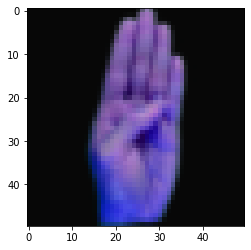

In [5]:
plt.imshow(X[1822])

In [6]:
#importing modules
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from keras.utils.np_utils import to_categorical
from tqdm import tqdm

In [7]:
#splitting
y_trainHot = to_categorical(y, num_classes = 26)
#y_testHot = to_categorical(y_test, num_classes = 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_trainHot, test_size=0.2,random_state = 12, shuffle = True)


X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2,random_state = 12, shuffle = True)

from sklearn.utils import shuffle

X_train,y_train = shuffle(X_train,y_train, random_state = 13)
X_test,y_test = shuffle(X_test,y_test, random_state = 13)
X_val,y_val = shuffle(X_val,y_val, random_state = 13)


In [8]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)

(30201, 50, 50, 3) (30201, 26)
(9438, 50, 50, 3) (9438, 26)
(7551, 50, 50, 3) (7551, 26)


In [9]:
#model
import keras
from tensorflow.keras.applications.mobilenet import MobileNet
b_model = MobileNet(weights = 'imagenet',include_top = False, input_shape = (200,200,3),pooling = 'avg')
import keras.layers as layers
model2 = keras.Sequential()

model2.add(layers.UpSampling2D((4,4)))
model2.add(b_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(1024,activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(256,activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(26,activation='softmax'))

for layer in b_model.layers:
  layer.trainable = False
b_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 100, 100, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 100, 100, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 100, 100, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 100, 100, 32

In [10]:
# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model2.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start Training
model_training_history = model2.fit(x = X_train, y = y_train, epochs = 10, batch_size = 32 , shuffle = True, callbacks = [early_stopping_callback],validation_data=(X_val,y_val))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpbft9wcy1.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpbft9wcy1.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
944/944 [==============================] - 619s 642ms/step - loss: 1.1931 - accuracy: 0.6377 - val_loss: 0.4485 - val_accuracy: 0.8498
Epoch 2/10
944/944 [==============================] - 614s 651ms/step - loss: 0.4009 - accuracy: 0.8678 - val_loss: 0.3424 - val_accuracy: 0.8896
Epoch 3/10
944/944 [==============================] - 661s 700ms/step - loss: 0.3189 - accuracy: 0.8910 

In [12]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

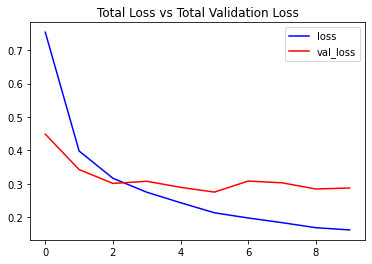

In [13]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

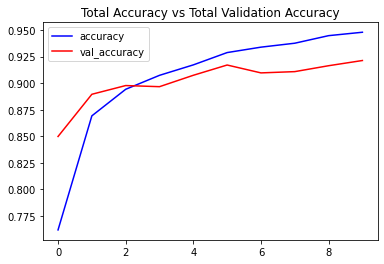

In [14]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [16]:
y_pred = model2.predict(X_test)

In [17]:
#this
import sklearn
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 


              precision    recall  f1-score   support

           A       0.79      0.97      0.87       354
           B       0.96      0.95      0.96       339
           C       0.95      0.93      0.94       352
           D       0.84      0.93      0.88       332
           E       0.87      0.96      0.91       347
           F       0.97      0.94      0.95       376
           G       0.91      0.95      0.93       351
           H       0.97      0.94      0.95       383
           I       0.99      0.74      0.85       384
           J       0.87      0.94      0.90       361
           K       0.92      0.92      0.92       359
           L       0.97      0.96      0.97       364
           M       0.88      0.87      0.87       401
           N       0.87      0.87      0.87       389
           O       0.96      0.93      0.94       385
           P       0.91      0.98      0.95       352
           Q       0.99      0.95      0.97       365
           R       0.95   

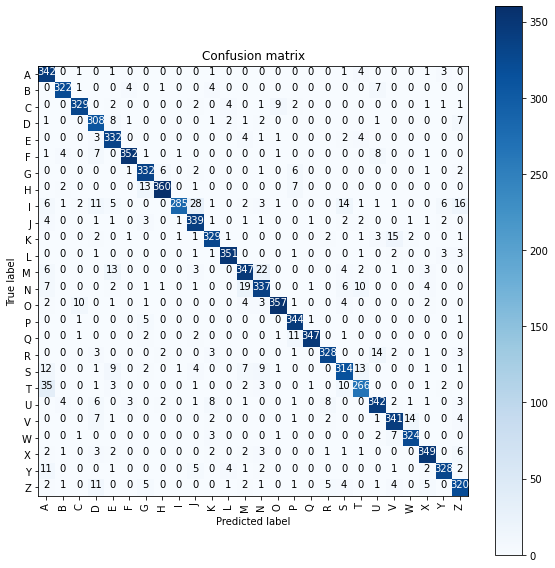

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
#this
from sklearn.metrics import confusion_matrix
import itertools
Y_pred = np.argmax(y_pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
conf = confusion_matrix(Y_true,Y_pred)
plot_confusion_matrix(conf,classes=list(labels.values()))

In [32]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, 200, 200, 3)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1024)              3228864   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0